In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('/content/zomato.csv', encoding='latin-1')


In [3]:
pd.set_option('display.max_columns', None)
train_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
train_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
train_df.shape

(9551, 21)

In [6]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
train_df.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
8195,18382345,Kwality Wall's Swirl's,1,Noida,"C-28/29, Food Court, Tower B, Logix Cyber Park...","Logix Cyber Park, Sector 62, Noida","Logix Cyber Park, Sector 62, Noida, Noida",77.366583,28.612373,"Ice Cream, Desserts",200,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
9343,6900724,Bodega,215,Birmingham,"12 Bennetts Hill, City Centre, Birmingham B2 5RS",City Centre,"City Centre, Birmingham",-1.900375,52.479690,Latin American,40,Pounds(£),No,No,No,No,3,4.6,Dark Green,Excellent,100
587,18340881,Barbeque Nation,214,Dubai,"G1, Villa, Near HQ Fitness, Near Lulu Mall, Ba...",Barsha 2,"Barsha 2, Dubai",55.215341,25.113380,"Indian, North Indian",150,Emirati Diram(AED),Yes,No,No,No,3,4.5,Dark Green,Excellent,307
9174,2700001,Hot Lips,1,Ranchi,"Near Chandini Chowk, Kanke Road, Gandhi Nagar,...",Gandhi Nagar,"Gandhi Nagar, Ranchi",85.316842,23.416792,"North Indian, Chinese",1000,Indian Rupees(Rs.),No,No,No,No,3,3.3,Orange,Average,65
3701,18312632,Pho King Awesome,1,New Delhi,"41 - Zamrudpur, Near Gurudwara, Greater Kailas...",Greater Kailash (GK) 1,"Greater Kailash (GK) 1, New Delhi",77.236709,28.549542,Asian,850,Indian Rupees(Rs.),No,Yes,No,No,2,4.1,Green,Very Good,253


In [8]:
train_df.describe()


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [9]:
train_df[train_df['Votes'] == train_df['Votes'].max()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
728,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,"Italian, American, Pizza",2000,Indian Rupees(Rs.),No,No,No,No,4,4.8,Dark Green,Excellent,10934


In [10]:
train_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [11]:
# sns.heatmap(train_df.isnull(), cmap())

In [12]:
country_df = pd.read_excel('/content/Country-Code.xlsx')

In [13]:
country_df.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [14]:
final_df=pd.merge(train_df, country_df, on='Country Code', how='left')

In [15]:
country_values=final_df['Country'].value_counts().values

In [16]:
country_values

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

In [17]:
country_names=final_df['Country'].value_counts().index

([<matplotlib.patches.Wedge at 0x7f1068126210>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

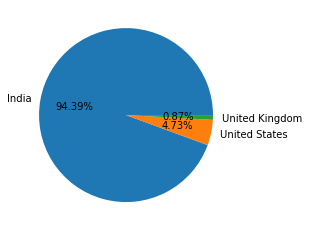

In [18]:
# plotting top 3 countries
plt.pie(country_values[:3], labels=country_names[:3], autopct='%1.2f%%')

In [19]:
final_df.groupby(['Country', 'Aggregate rating']).size()

Country        Aggregate rating
Australia      2.4                  1
               2.6                  1
               2.9                  1
               3.2                  1
               3.4                  1
                                   ..
United States  4.5                 24
               4.6                 18
               4.7                  9
               4.8                  3
               4.9                 14
Length: 222, dtype: int64

In [20]:
final_df[final_df['Aggregate rating'] == 0]['Country'].value_counts()

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

In [21]:
final_df.groupby(['Country', 'Currency']).size()

Country         Currency              
Australia       Dollar($)                   24
Brazil          Brazilian Real(R$)          60
Canada          Dollar($)                    4
India           Indian Rupees(Rs.)        8652
Indonesia       Indonesian Rupiah(IDR)      21
New Zealand     NewZealand($)               40
Phillipines     Botswana Pula(P)            22
Qatar           Qatari Rial(QR)             20
Singapore       Dollar($)                   20
South Africa    Rand(R)                     60
Sri Lanka       Sri Lankan Rupee(LKR)       20
Turkey          Turkish Lira(TL)            34
UAE             Emirati Diram(AED)          60
United Kingdom  Pounds(£)                  80
United States   Dollar($)                  434
dtype: int64

In [22]:
final_df[final_df['Has Online delivery'] == 'Yes']['Country'].value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

# **Univariate Analysis**
**Observations**
 
1 - Dataset contains most of the data from indian cities 
    New Delhi, Gurgaon, Noida.

2 - 74% customers has not Online delivered online.  

3 - 99% of the orders are delievering now.

4 - Most of the customers rated Average & Not Rated.

5 - Most of the customers are from India 94%. & then from USA & Uk

6 - Top 5 Cuisines are [North Indian], [North Indian, Chinese], [Chinese], [Fast Food], [North Indian, Mughlai]

In [23]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [24]:
final_df.shape

(9551, 22)

In [25]:
final_df['City'].value_counts()

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

([<matplotlib.patches.Wedge at 0x7f1067be9a50>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

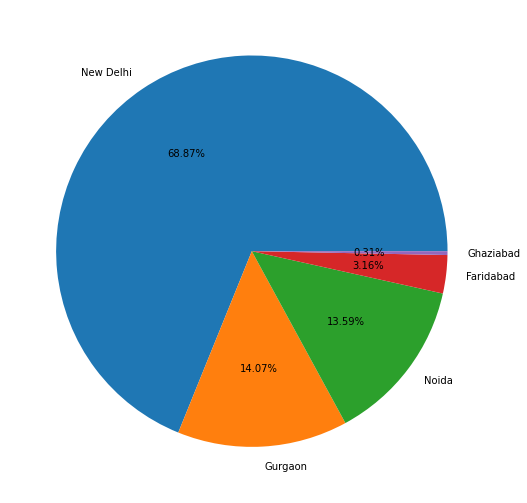

In [26]:
plt.rcParams["figure.figsize"] = (12,9)

plt.pie(final_df['City'].value_counts()[:5].values, labels=final_df['City'].value_counts().index[:5], autopct='%1.2f%%')

In [27]:
final_df['Has Online delivery'].reset_index().sample(15)

,index,Has Online delivery
7267,7267,No
1723,1723,No
4251,4251,Yes
4233,4233,Yes
3574,3574,Yes
5193,5193,Yes
2788,2788,No
465,465,No
5092,5092,No
4944,4944,No


In [28]:
final_df['Has Online delivery'].value_counts()

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

([<matplotlib.patches.Wedge at 0x7f1067b61790>,
 [Text(-0.7614681082348079, 0.7938301582462732, 'No'),
  Text(0.7614681825585476, -0.7938300869524803, 'Yes')],
 [Text(-0.4153462408553497, 0.4329982681343308, '74.34%'),
  Text(0.41534628139557145, -0.43299822924680736, '25.66%')])

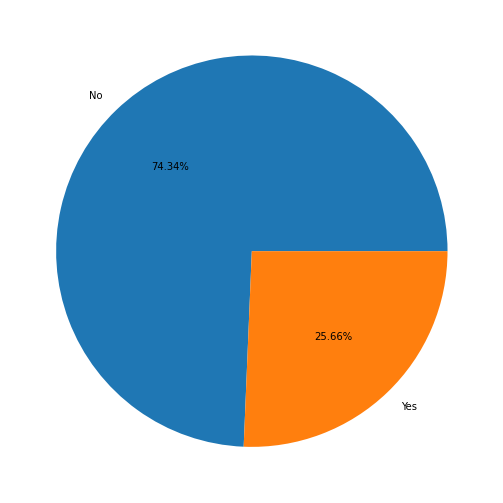

In [29]:
plt.pie(final_df['Has Online delivery'].value_counts().values, labels=final_df['Has Online delivery'].value_counts().index, autopct='%1.2f%%')

In [30]:
final_df['Is delivering now'].value_counts()

No     9517
Yes      34
Name: Is delivering now, dtype: int64

([<matplotlib.patches.Wedge at 0x7f1067b33bd0>,
 [Text(-1.099931211491959, 0.012301625332929689, 'No'),
  Text(1.0999312118338875, -0.012301594759853728, 'Yes')],
 [Text(-0.599962478995614, 0.006709977454325284, '99.64%'),
  Text(0.5999624791821204, -0.0067099607781020325, '0.36%')])

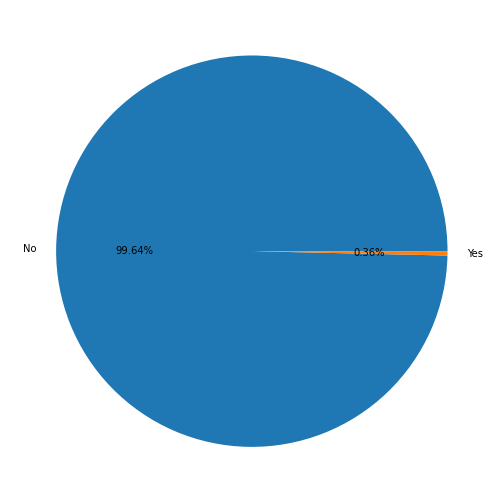

In [31]:
plt.pie(final_df['Is delivering now'].value_counts().values, labels=final_df['Is delivering now'].value_counts().index, autopct='%1.2f%%')

In [32]:
final_df['Price range'].value_counts()


1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


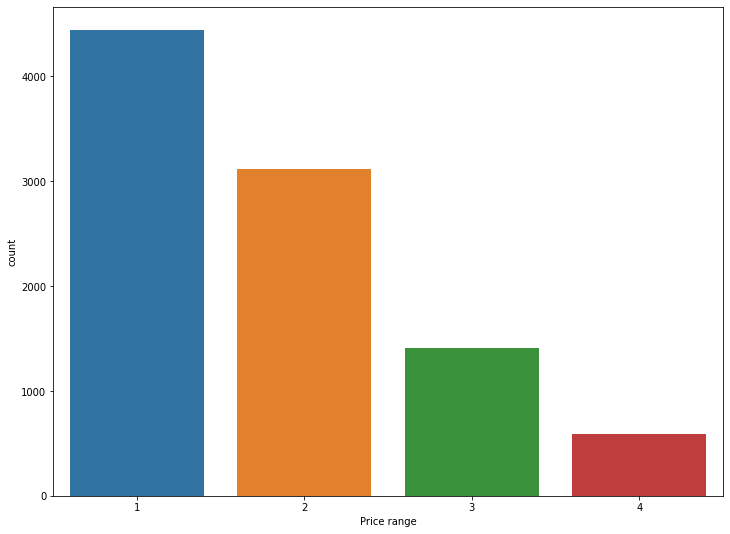

In [33]:
sns.countplot(final_df['Price range'])

In [34]:
final_df['Aggregate rating'].head(5)

0    4.8
1    4.5
2    4.4
3    4.9
4    4.8
Name: Aggregate rating, dtype: float64

In [35]:
final_df['Rating color'].value_counts()

Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: Rating color, dtype: int64

([<matplotlib.patches.Wedge at 0x7f1067a6d890>,
 [Text(0.3684861700797763, 1.0364448574140055, 'Orange'),
  Text(-1.0997000414954674, -0.02568693704721014, 'White'),
  Text(-0.16455128028787028, -1.087622579829797, 'Yellow'),
  Text(0.8585786329981525, -0.6876356091412253, 'Green'),
  Text(1.0731576417576685, -0.24152158482653235, 'Dark Green'),
  Text(1.0979419528893613, -0.06725673264065082, 'Red')],
 [Text(0.2009924564071507, 0.5653335585894576, '39.13%'),
  Text(-0.5998363862702549, -0.014011056571205528, '22.49%'),
  Text(-0.08975524379338379, -0.5932486799071619, '21.99%'),
  Text(0.46831561799899224, -0.3750739686224865, '11.30%'),
  Text(0.5853587136860009, -0.13173904626901764, '3.15%'),
  Text(0.5988774288487424, -0.03668549053126408, '1.95%')])

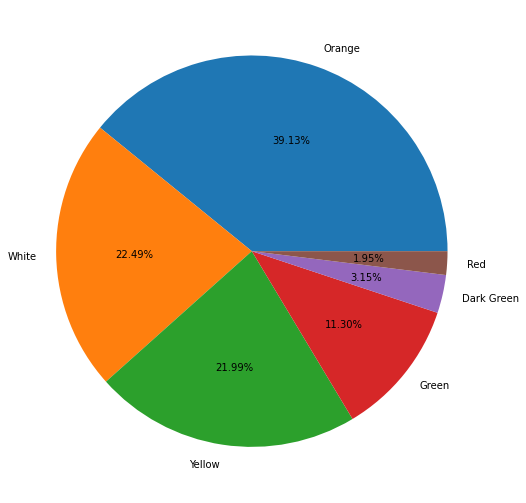

In [36]:
plt.pie(final_df['Rating color'].value_counts().values, labels=final_df['Rating color'].value_counts().index, autopct='%1.2f%%')

In [37]:
final_df['Rating text'].value_counts()


Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

([<matplotlib.patches.Wedge at 0x7f10679d8810>,
 [Text(0.3684861700797763, 1.0364448574140055, 'Average'),
  Text(-1.0997000414954674, -0.02568693704721014, 'Not rated'),
  Text(-0.16455128028787028, -1.087622579829797, 'Good'),
  Text(0.8585786329981525, -0.6876356091412253, 'Very Good'),
  Text(1.0731576417576685, -0.24152158482653235, 'Excellent'),
  Text(1.0979419528893613, -0.06725673264065082, 'Poor')],
 [Text(0.2009924564071507, 0.5653335585894576, '39.13%'),
  Text(-0.5998363862702549, -0.014011056571205528, '22.49%'),
  Text(-0.08975524379338379, -0.5932486799071619, '21.99%'),
  Text(0.46831561799899224, -0.3750739686224865, '11.30%'),
  Text(0.5853587136860009, -0.13173904626901764, '3.15%'),
  Text(0.5988774288487424, -0.03668549053126408, '1.95%')])

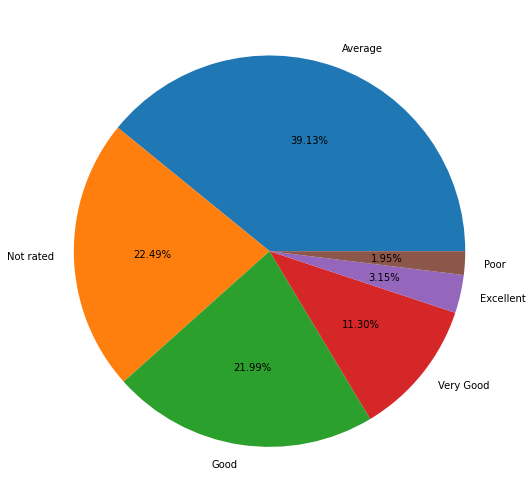

In [38]:
plt.pie(final_df['Rating text'].value_counts().values, labels=final_df['Rating text'].value_counts().index, autopct='%1.2f%%')

In [39]:
final_df['Country'].value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

([<matplotlib.patches.Wedge at 0x7f1067945550>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

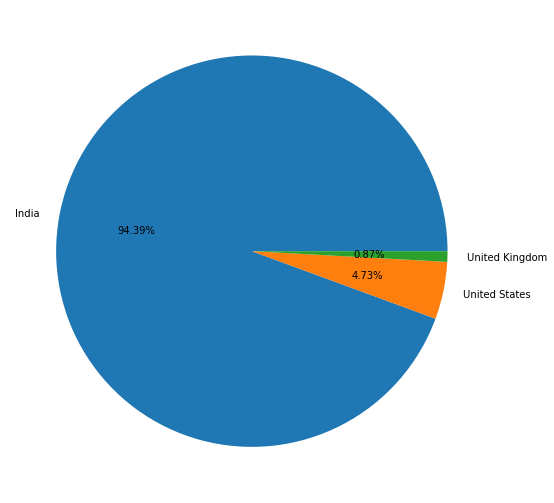

In [40]:
plt.pie(final_df['Country'].value_counts().values[:3], labels=final_df['Country'].value_counts().index[:3], autopct='%1.2f%%')

In [53]:
final_df['Cuisines'].value_counts()[:5]

North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: Cuisines, dtype: int64

([<matplotlib.patches.Wedge at 0x7f1064d44690>,
 [Text(0.4175823090707363, 1.0176566292965188, 'North Indian'),
  Text(-1.090169487983684, 0.14673270756512372, 'North Indian, Chinese'),
  Text(-0.6326704341218391, -0.8998489438722946, 'Chinese'),
  Text(0.3048764124205039, -1.0569060379946758, 'Fast Food'),
  Text(1.0036916287969155, -0.45011455684413826, 'North Indian, Mughlai')],
 [Text(0.22777216858403795, 0.5550854341617375, '37.61%'),
  Text(-0.5946379025365549, 0.0800360223082493, '20.53%'),
  Text(-0.3450929640664576, -0.4908266966576152, '14.22%'),
  Text(0.16629622495663846, -0.5764942025425503, '14.22%'),
  Text(0.5474681611619538, -0.24551703100589356, '13.42%')])

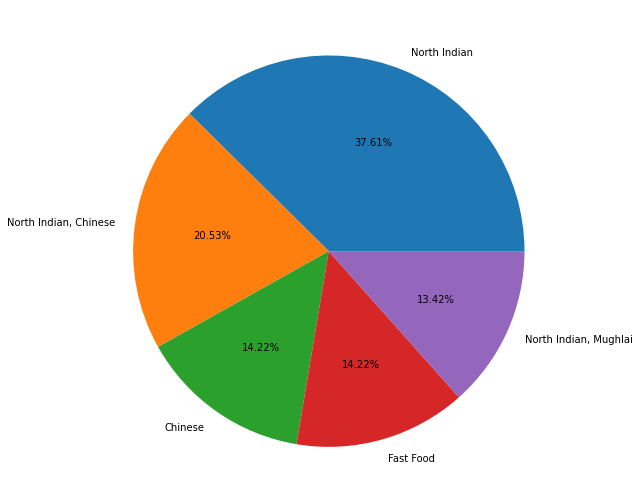

In [54]:
plt.pie(final_df['Cuisines'].value_counts().values[:5], labels=final_df['Cuisines'].value_counts().index[:5], autopct='%1.2f%%')

# **Multivariate Analysist**

1 - In Ratings 0 represents **Not rated** & **White**

2 - Rating from 1 to 2.4 represents **Poor** & **Red**

3 - Rating from 2.5 to 3.4 represents **Poor** & **Orange**

4 - Rating from 3.5 to 3.9 represents **Good** & **Yellow**

5 - Rating from 4 to 4.4 represents **Very Good** & **Green**

6 - 4.5 & Above represents **Excellent** & **Dark Green** 

In [42]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [44]:
final_df.shape


(9551, 22)

In [50]:
final_df[['City', 'Cuisines']].sample(5)

,City,Cuisines
2282,Guwahati,Cafe
122,Athens,"Desserts, Latin American, Argentine"
6378,New Delhi,North Indian
1288,Gurgaon,"Italian, Pizza, Fast Food"
6637,New Delhi,"North Indian, Chinese"


In [60]:
final_df.groupby(['Aggregate rating', 'Rating text', 'Rating color']).size()

Aggregate rating  Rating text  Rating color
0.0               Not rated    White           2148
1.8               Poor         Red                1
1.9               Poor         Red                2
2.0               Poor         Red                7
2.1               Poor         Red               15
2.2               Poor         Red               27
2.3               Poor         Red               47
2.4               Poor         Red               87
2.5               Average      Orange           110
2.6               Average      Orange           191
2.7               Average      Orange           250
2.8               Average      Orange           315
2.9               Average      Orange           381
3.0               Average      Orange           468
3.1               Average      Orange           519
3.2               Average      Orange           522
3.3               Average      Orange           483
3.4               Average      Orange           498
3.5               Go